<a href="https://colab.research.google.com/github/PatriciaBonert/OsloAirbnb/blob/master/Analisando_a_Viol%C3%AAncia_no_Rio_de_Janeirob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

**Instruções para o Projeto**

* Você deve importar o pandas e importar a base de dados da Polícia Militar do Rio de Janeiro sobre a violência
  * O arquivo `csv` se encontra no endereço abaixo:
    * https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_02/violencia_rio.csv
  * Este arquivo `csv` foi pré-processado minimamente por mim, para focar nos pontos aprendidos neste Módulo
  * Este é o site oficial, do Governo do Estado do Rio de Janeiro:
    * http://www.ispdados.rj.gov.br/estatistica.html
  * Um *dashboard* interativo e visual pode ser encontrado no site abaixo:
    * http://www.ispvisualizacao.rj.gov.br/index.html
  * Você está livre para apagar, alterar e acrescentar o que quiser!
  * Se você sentiu dificuldade, não se preocupe! Disponibilizei a minha própria solução para servir de guia, porém tente fazer a sua por você mesmo inicialmente.
    * Se sentir perdido é normal, mas acredite: O seu cérebro vai começar a adquirir uma capacidade nova de pensar em hipóteses e questionar dados.
  
  
---
  

<center><img src="http://sigmoidal.ai/wp-content/uploads/2019/08/logo_color.png" height="40px"></center>

# Analisando a Violência no Rio de Janeiro

A violência urbana é responsável pela queda na qualidade de vida dos cidadãos nas maiores cidades do país, trazendo inúmeros prejuízos para todos. Um dos principais fatores do aumento da violência urbana é, justamente, o crescimento desordenado das cidades, incapaz de fornecer iguais condições de vida para todos. O resultado desse crescimento é a criação de áreas periféricas cada vez maiores e desorganizadas, nas quais o poder público não consegue ou não demonstra interesse em oferecer serviços mais básicos para a população.

No Rio de Janeiro, o sociólogo Ignacio Cano em entrevista à BBC News Brasil, lembra que o contexto de violência nos anos 1990 ainda era visto como um resquício da ditadura militar. Já a escalada de violência vivida hoje provoca maior desalento pelos avanços que se perderam pelo caminho, com "uma regressão muito profunda de 2013 para cá" após um período de melhoras nos índices criminais.

A partir dos dados abertos disponibilizados pelo Governo do Rio de Janeiro segundo registros da Polícia Militar, será realizado um breve estudo dos crimes na cidade e análises que forem pertinentes.

### Obtenção dos dados

Importanto as bibliotecas necessárias e criando um DataFrame.

In [0]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_02/violencia_rio.csv')

In [3]:
print('Tamanho do DataFrame: ',df.shape,);
print('Nomes das colunas:\n', df.dtypes);

Tamanho do DataFrame:  (344, 56)
Nomes das colunas:
 vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int

Verificando o formato do DataFrame

In [4]:
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


Verificando a porcentagem de valores nulos (NaN)

In [5]:
(df.isnull().sum() / df.shape[0] ) *100

vano                           0.000000
mes                            0.000000
hom_doloso                     0.000000
lesao_corp_morte              27.906977
latrocinio                     0.000000
hom_por_interv_policial       24.418605
tentat_hom                     0.000000
lesao_corp_dolosa              0.000000
estupro                       41.860465
hom_culposo                   24.418605
lesao_corp_culposa            27.906977
roubo_comercio                 0.000000
roubo_residencia               0.000000
roubo_veiculo                  0.000000
roubo_carga                    0.000000
roubo_transeunte               0.000000
roubo_em_coletivo              0.000000
roubo_banco                    0.000000
roubo_cx_eletronico           41.860465
roubo_celular                 31.395349
roubo_conducao_saque          41.860465
roubo_apos_saque              41.860465
roubo_bicicleta               80.232558
outros_roubos                  0.000000
total_roubos                   0.000000


###Tratamento dos dados

In [6]:
df.drop(['apf','aaapai','cmp','cmba'], axis=1,inplace=True)
df.shape

(344, 52)

###Informações Estatísticas da Violência no Rio de Janeiro



In [7]:
print('Resumo estatístico:\n', df.describe())

Resumo estatístico:
               vano         mes  ...  registro_ocorrencias        fase
count   344.000000  344.000000  ...            248.000000  344.000000
mean   2004.837209    6.453488  ...          53794.161290    2.994186
std       8.289036    3.447759  ...          11039.051992    0.076138
min    1991.000000    1.000000  ...          30621.000000    2.000000
25%    1998.000000    3.000000  ...          45374.500000    3.000000
50%    2005.000000    6.000000  ...          54926.500000    3.000000
75%    2012.000000    9.000000  ...          63292.500000    3.000000
max    2019.000000   12.000000  ...          75403.000000    3.000000

[8 rows x 52 columns]


In [8]:
print(" A média de veículos roubados é: {0:.2f} por mês".format(df.roubo_veiculo.mean()))
print(" A média de veículos furtados é: {0:.2f} por mês".format(df.furto_veiculos.mean()))
print(" A média de recuperação dos veículos é: {0:.2f} por mês".format(df.recuperacao_veiculos.mean()))

 A média de veículos roubados é: 2448.70 por mês
 A média de veículos furtados é: 1674.67 por mês
 A média de recuperação dos veículos é: 1772.24 por mês


In [9]:
taxa_recupera = df.recuperacao_veiculos.mean()/ (df.roubo_veiculo.mean() + df.furto_veiculos.mean() )
print("%.2f"% taxa_recupera)

0.43


In [10]:
print('O número mínimo de homicídios dolosos é de {}'.format(df.hom_doloso.min()))
print('O número máximo de homicídios dolosos é de {}'.format(df.hom_doloso.max()))

O número mínimo de homicídios dolosos é de 272
O número máximo de homicídios dolosos é de 831


###Visualização de Dados


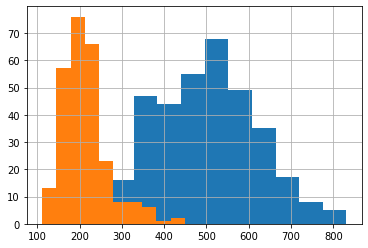

In [14]:
df.hom_doloso.hist();
df.hom_culposo.hist();

Dentro dos respectivos períodos analisados, os histogramas se comportam da mesma forma:variáveis centradas na média mas com alguns períodos em que o número de ocorrências é elevado.

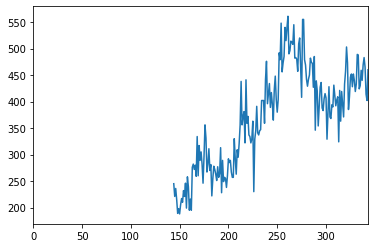

In [13]:
df.estupro.plot(kind='line');

O número de ocorrências de crimes de estupro têm apresentado uma tendência de crescimento.